In [1]:
from src.aff_core import rho_aff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import matplotlib.ticker as mticker
import torch

c:\Users\i00814697\AppData\Local\Programs\Python\Python38\lib\site-packages\ot\backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


In [2]:
sbs.set_context("talk")
cmap = sbs.cubehelix_palette(as_cmap=True)
colorsList = cmap(np.linspace(0, 1, 3))
plt.rcParams.update({'figure.autolayout': True})

In [3]:
np.random.seed(987)

n = 1000 # number of points
d = 1 # dimensionality of the data
do_shrink = False # whether to use shrinkage of the covariance matrix

xmin = -1
xmax = 1
degrees = [1, 3, 5, 7, 11, 21, 31, 41] # degrees for considered polynomials

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32


c:\Users\i00814697\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


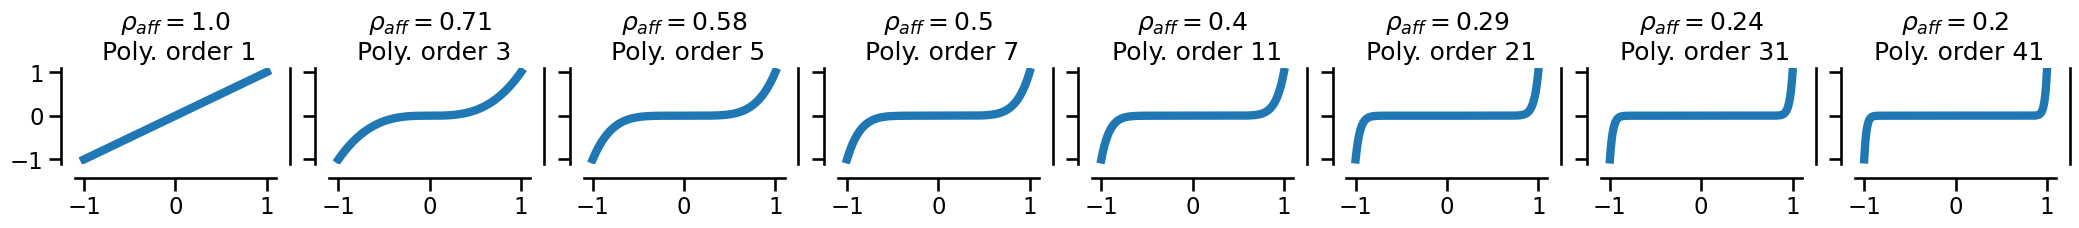

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=len(degrees), figsize=(21, 21/(len(degrees))), sharey='row')
fig.tight_layout()

input = np.linspace(xmin, xmax, n)
input = input[np.newaxis, :]

for i,xmax in enumerate(degrees):
        
    output_quadratic = input**(xmax)

    aff_score = rho_aff(torch.as_tensor(input, dtype=torch.float32), torch.as_tensor(output_quadratic, dtype=torch.float32), correctCov=do_shrink, device='cpu')

    axes[i].yaxis.offsetText.set_visible(False)
    sort_inds = np.argsort(input.squeeze())

    axes[i].plot(input.squeeze()[sort_inds], output_quadratic.squeeze()[sort_inds], lw=6)
    axes[i].set_title(r'$\rho_{aff}=$'+str(round(aff_score,2))+'\n Poly. order '+str(xmax))

    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,1))

    axes[i].figure.canvas.draw()

    offset = axes[i].yaxis.get_major_formatter().get_offset()

    if offset != '':
        axes[i].xaxis.get_label().set_fontsize(8)
        axes[i].yaxis.set_label_text('x'+offset)
        
    sbs.despine(fig, axes[i], trim=False, right=False, offset=10)